In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../data/tips.csv')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,NaN,1.66,Male,No,Sun,Dinner,3


(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

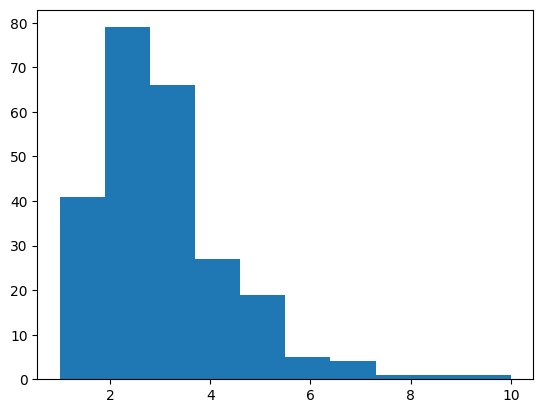

In [3]:
plt.hist(df['tip']) # serie pandas
# plt.plot(df['tip'].values) # array numpy
# type(df['tip'].values)

In [4]:
df_tip_by_time = pd.DataFrame(df.groupby('time')['tip'].sum()).reset_index()
df_tip_by_time

,time,tip
0,Dinner,546.07
1,Lunch,185.51


<BarContainer object of 2 artists>

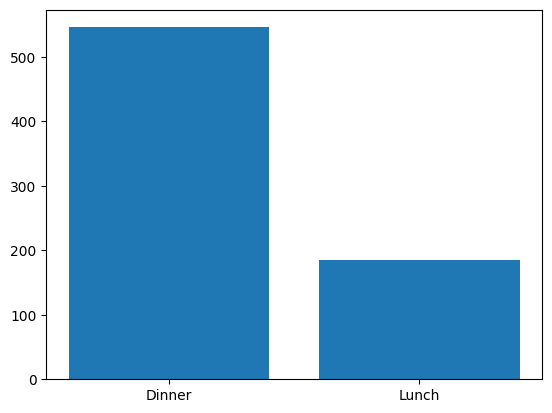

In [5]:
plt.bar(df_tip_by_time['time'], df_tip_by_time['tip'])

Text(0.5, 0, 'Dineritos')

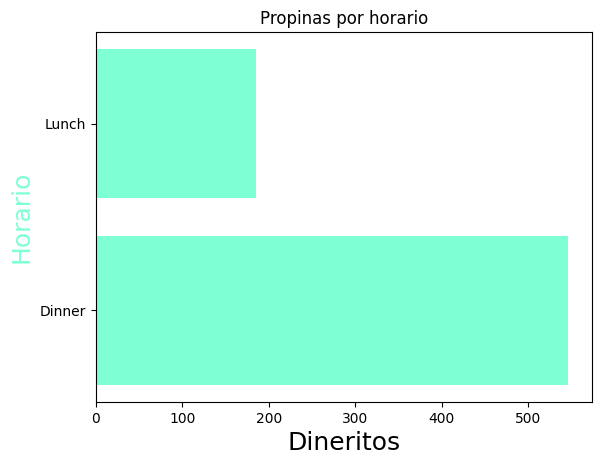

In [6]:
plt.barh(df_tip_by_time['time'], df_tip_by_time['tip'], color = "aquamarine")
# Personalizar: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.title('Propinas por horario')
plt.ylabel('Horario', size=18, color='aquamarine')
plt.xlabel('Dineritos', size=18)

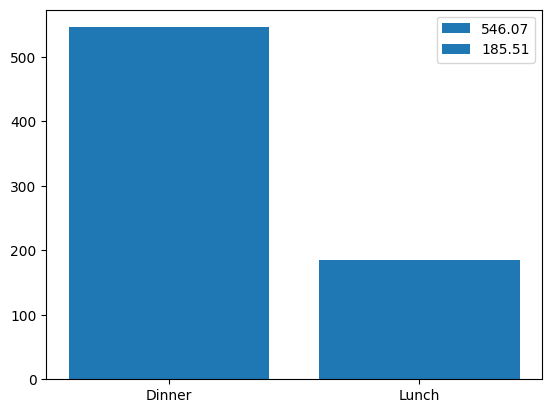

In [7]:
bars = plt.bar(df_tip_by_time['time'], df_tip_by_time['tip'])
labels = [str(bar.get_height()) for bar in bars]
plt.legend(bars, labels)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

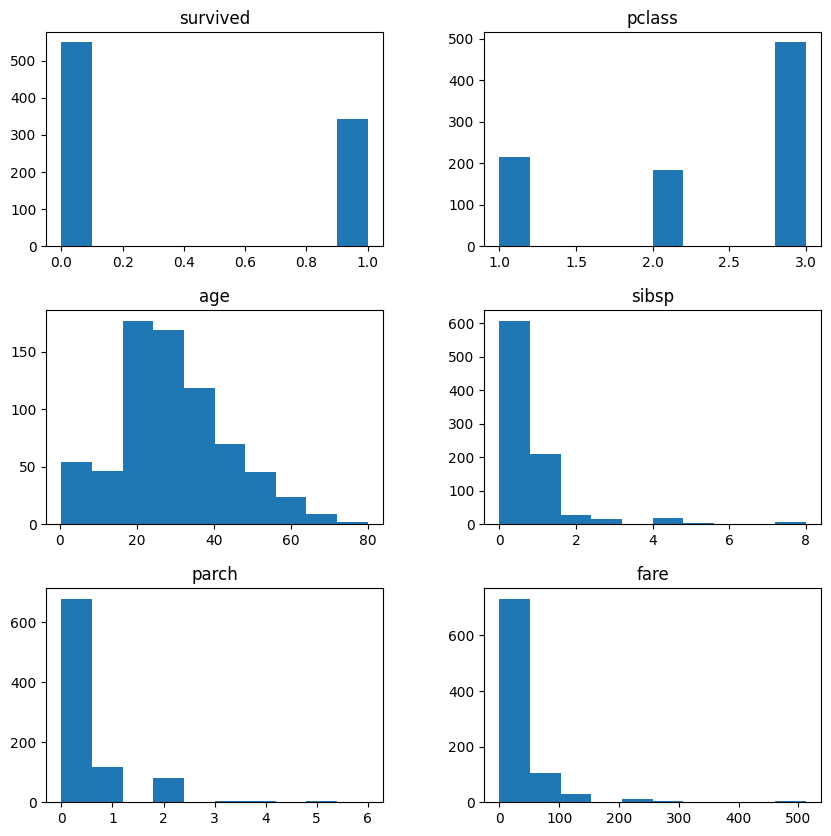

In [8]:
# histogram directamente con pandas
df = pd.read_csv('../../../data/titanic.csv')
# df.hist(figsize=(10, 10))
df.hist(figsize=(10, 10), grid=False)

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

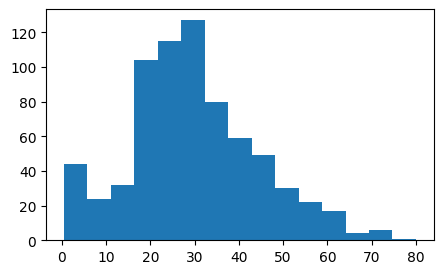

In [9]:
plt.figure(figsize=(5,3))
plt.hist(df['age'], bins=15)

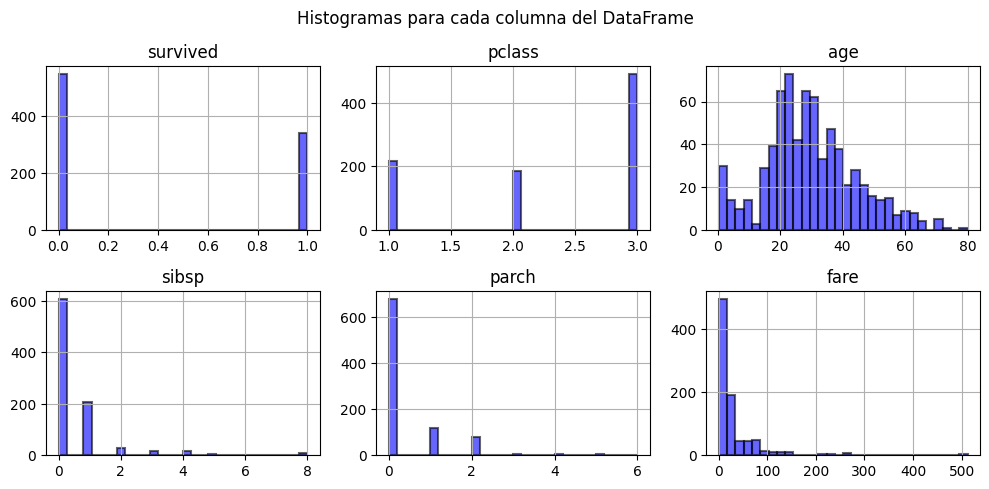

In [10]:
df.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(10,7), layout=(3,3))
plt.suptitle('Histogramas para cada columna del DataFrame')
plt.tight_layout()

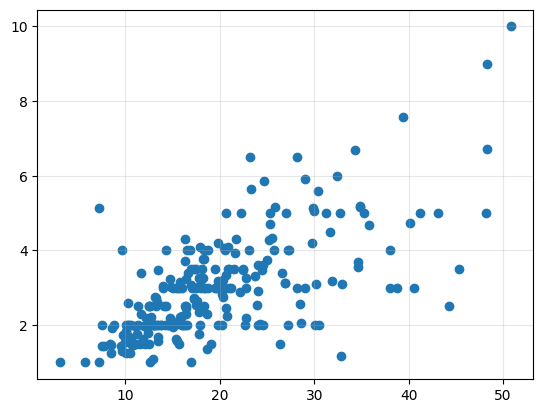

In [11]:
df = pd.read_csv('../../../data/tips.csv')
plt.scatter(df['total_bill'], df['tip'])
plt.grid(alpha=0.3)

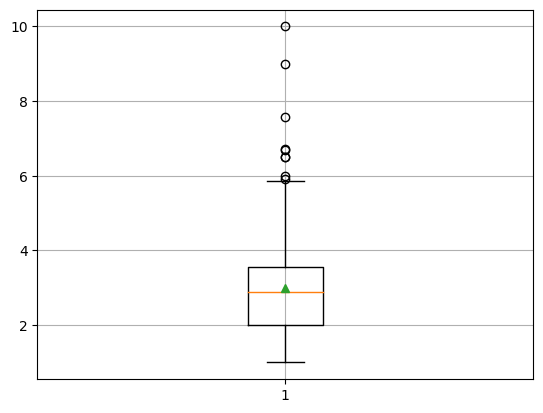

In [12]:
plt.boxplot(df['tip'], showmeans=True)
plt.grid()

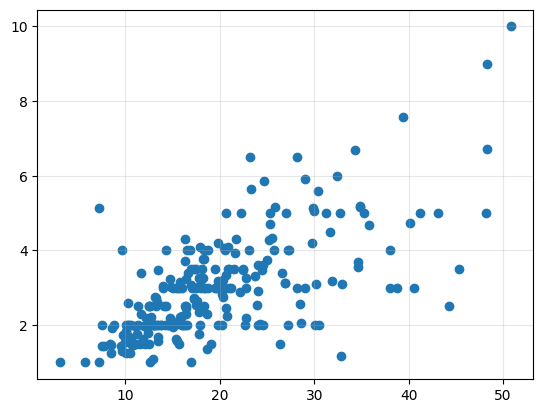

In [18]:
df = pd.read_csv('../../../data/tips.csv')
plt.scatter(df['total_bill'], df['tip'])
plt.grid(alpha=0.3)
plt.savefig('example1.webp', dpi=50)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1fb84a1c580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1fb84a1c370>,
 'cmins': <matplotlib.collections.LineCollection at 0x1fb84a1ee60>,
 'cbars': <matplotlib.collections.LineCollection at 0x1fb84a1d270>}

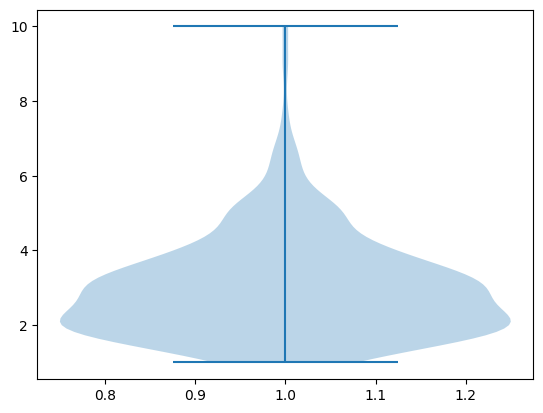

In [19]:
df = pd.read_csv('../../../data/tips.csv')
plt.violinplot(df['tip'])

Text(0.5, 1.0, 'size')

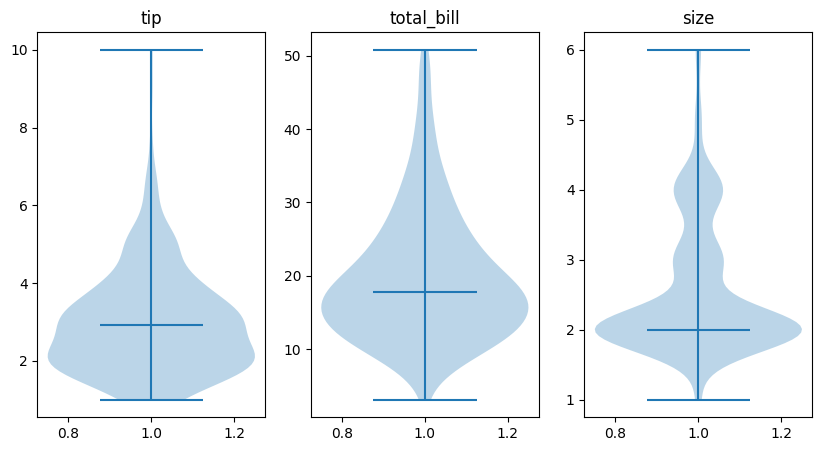

In [33]:
df = pd.read_csv('../../../data/tips.csv').dropna()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

ax1.violinplot(df['tip'], showmedians=True)
ax1.set_title('tip')

ax2.violinplot(df['total_bill'], showmedians=True)
ax2.set_title('total_bill')

ax3.violinplot(df['size'], showmedians=True)
ax3.set_title('size')

# plt.savefig('violin_plots_tips.png')

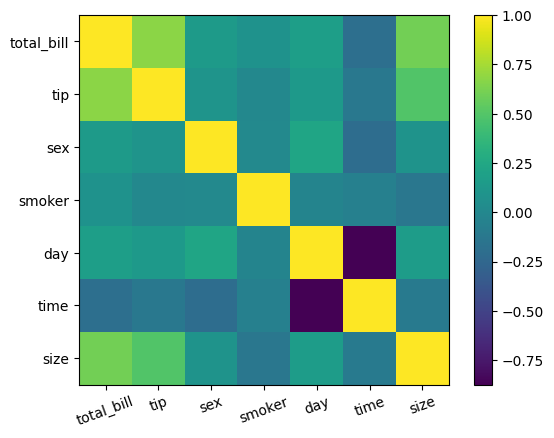

In [50]:
df = pd.read_csv('../../../data/tips.csv').dropna()

# ver los valores únicos para cada columna
# print(df['sex'].unique())
# print(df['time'].unique())
# print(df['smoker'].unique())
# print(df['day'].unique())

# transformar las columnas de texto a numérico: .map()
df['sex'] = df['sex'].map({
    'Female': 0,
    'Male': 1
})

df['time'] = df['time'].map({
    'Dinner': 0,
    'Lunch': 1
})

df['smoker'] = df['smoker'].map({
    'No': 0,
    'Yes': 1
})

df['day'] = df['day'].map({
    'Thur': 0,
    'Fri': 1,
    'Sat': 2,
    'Sun': 3,
})

# calcular correlaciones
df_corr = df.corr()

# mostrar las correlaciones con matplotlib
plt.imshow(df_corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=20)
plt.yticks(range(len(df_corr)), df_corr.columns);

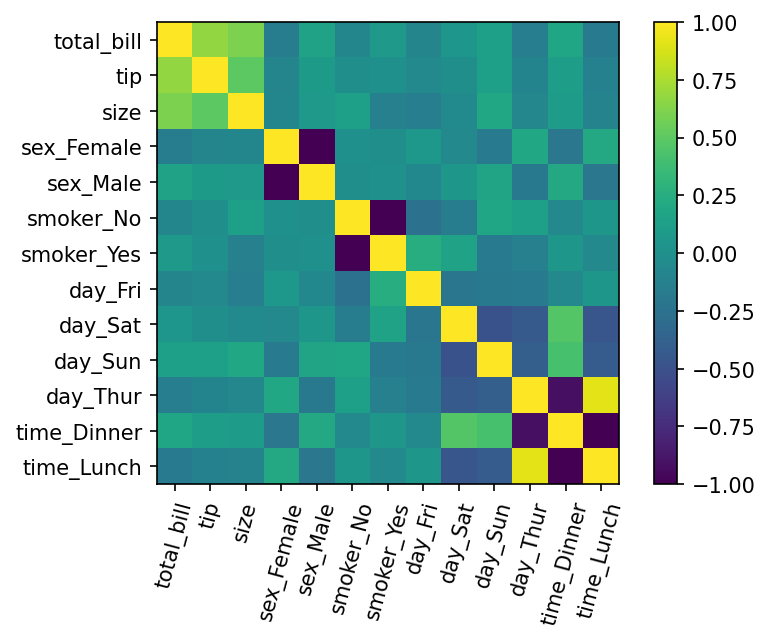

In [59]:
# crear una nueva columna por cada posible valor de las columnas texto utilizando 
# get_dummies()
df = pd.read_csv('../../../data/tips.csv').dropna()
df = pd.get_dummies(df)
df_corr = df.corr()

plt.figure(figsize=(6,4), dpi=150)
plt.imshow(df_corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=75)
# ponemos ; para que no muestre la salida de plt.yticks
plt.yticks(range(len(df_corr)), df_corr.columns);


In [ ]:
# crear una función que reciba un dataframe y devuelva ese dataframe 
# con todas las columnas de tipo texto mapeadas a numérico